# 1. Many ways of performance test of model

## 1.1 Classification

### 1.1.1 Receiver Operating Characteristic (ROC) Curve (Supervised, labelled)

ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

true positive (TP): 
A test result that correctly indicates the presence of a condition or characteristic\
true negative (TN): 
A test result that correctly indicates the absence of a condition or characteristic\
false positive (FP): 
A test result which wrongly indicates that a particular condition or attribute is present\
false negative (FN): 
A test result which wrongly indicates that a particular condition or attribute is absent\
${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$\
${\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }$

### 1.1.2 Confusion Matrix (Supervised, labelled)

Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). It provides a summary of correct and incorrect predictions made by the algorithm. The matrix has four components: True Positives, False Positives, True Negatives, and False Negatives.

<img src="img/ConfusionMatrix.webp" alt="drawing" width="400"/>

### 1.1.3 Precision-Recall Curve (Supervised, labelled)

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. The Precision-Recall curve is similar to the ROC curve but instead of the False Positive Rate, it plots the Precision (True Positives / (True Positives + False Positives)) against the Recall (True Positives / (True Positives + False Negatives)).

### 1.1.4 F1 Score (Supervised, labelled)

the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. The F1 score is the harmonic mean of the precision and recall. The more generic ${\displaystyle F_{\beta }}$ score applies additional weights, valuing one of precision or recall more than the other.

${\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}}$\
$F_\beta = \frac {(1 + \beta^2) \cdot \mathrm{true\ positive} }{(1 + \beta^2) \cdot \mathrm{true\ positive} + \beta^2 \cdot \mathrm{false\ negative} + \mathrm{false\ positive}}\,$

### 1.1.5 Silhouette Score (Unsupervised, Unlabelled)

The silhouette score is a measure of how well each sample in a clustering algorithm has been classified. It provides an estimate of the similarity between an observation and the other points within its own cluster, compared to the similarity between that observation and points in other clusters. The score ranges from -1 to 1, with a high score indicating that the sample is well-matched to its own cluster and poorly-matched to other clusters. A score of 0 indicates that the sample is on or close to the decision boundary between two clusters.

The silhouette score can be a useful tool for determining the optimal number of clusters in a clustering algorithm. Generally, a higher silhouette score indicates a better clustering solution, although the optimal number of clusters may also depend on the specific requirements of the problem at hand. The silhouette score can also be visualized using a silhouette plot, which shows the silhouette score for each sample on the y-axis and the silhouette coefficient values on the x-axis.

### 1.1.6 
## 1.2 Regression
### 1.2.1 R-square

R-squared is a measure of the proportion of variance in the dependent variable (also known as the response or output variable) that can be explained by the independent variables (also known as predictors or inputs) in the regression model. R2 values range from 0 to 1, with a higher value indicating a better fit of the model to the data. R2 can be interpreted as the percentage of the total variance in the response variable that is explained by the model.

${\displaystyle {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$\
${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$\
${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$\
${\displaystyle R^{2}=1-{{\sum _{i}e_{i}^{2}} \over \sum _{i}(y_{i}-{\bar {y}})^{2}}}$

### 1.2.2 RMSE

Root mean squared error (RMSE) is a measure of the difference between the actual and predicted values in a regression model. It is calculated by taking the square root of the mean of the squared differences between the actual and predicted values. The RMSE provides an estimate of the average magnitude of the errors in the predictions, with a lower RMSE indicating a better fit of the model to the data.

${\displaystyle \operatorname {RMSD} ={\sqrt {\frac {\sum _{n=1}^{N}({\hat {y}}_{n}-y_{n})^{2}}{N}}}}$

F1 score: 0.5


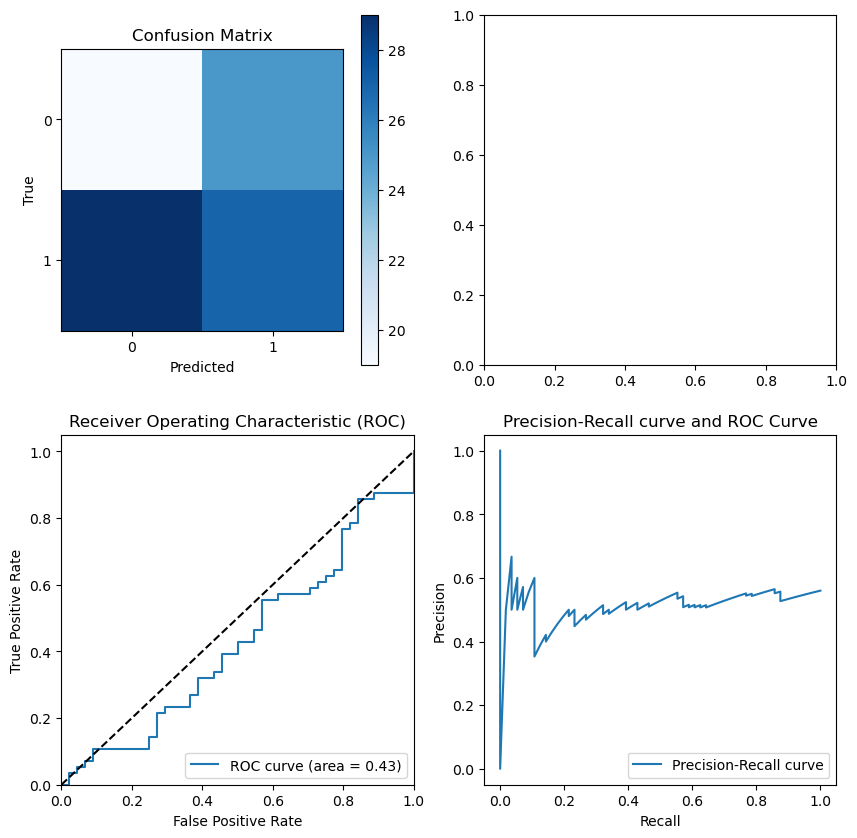

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score
np.random.seed(0) # Generate some fake data
y_true = np.random.randint(2, size=100)
y_probs = np.random.rand(100)
cm = confusion_matrix(y_true, (y_probs > 0.5)) # Calculate the confusion matrix
roc_auc = roc_auc_score(y_true, y_probs) # Calculate the ROC AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_probs) # Plot the ROC curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs) # Calculate the Precision-Recall curve
tick_marks = np.arange(2)
# Calculate the F1 score
f1 = f1_score(y_true, (y_probs > 0.5))
print("F1 score:", f1)
fig, ax = plt.subplots(2,2, figsize=(10,10))
a1=ax[0,0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax[0,0].set_title("Confusion Matrix")
fig.colorbar(a1)
ax[0,0].set_xticks(tick_marks, [0, 1])
ax[0,0].set_yticks(tick_marks, [0, 1])
ax[0,0].set_xlabel("Predicted")
ax[0,0].set_ylabel("True")
ax[1,0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1,0].plot([0, 1], [0, 1], 'k--')
ax[1,0].set_xlim([0.0, 1.0])
ax[1,0].set_ylim([0.0, 1.05])
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('Receiver Operating Characteristic (ROC)')
ax[1,0].legend(loc="lower right")
ax[1,1].plot(recall, precision, label='Precision-Recall curve') # Plot the Precision-Recall curve
ax[1,1].set_xlabel('Recall')
ax[1,1].set_ylabel('Precision')
ax[1,1].set_title('Precision-Recall curve and ROC Curve')
ax[1,1].legend(loc="lower right")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5743946554642042
For n_clusters = 6 The average silhouette_score is : 0.5141489067073599
For n_clusters = 7 The average silhouette_score is : 0.3760049728078914
For n_clusters = 8 The average silhouette_score is : 0.31390602192712663


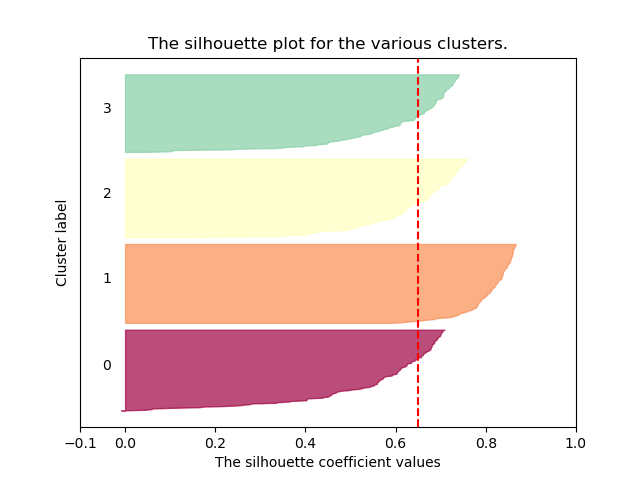

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import os
import cv2
import imageio
from IPython.display import Image as IpyImage
# Generate sample data
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

# Number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = km.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    

    plt.title(f"The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.savefig(f'graphs/silhou/silhouette0{i+1}.png')
    plt.close()
imgs = os.listdir('graphs/silhou/')
imgs.sort()
imgs=imgs[2:]
imgs = [cv2.imread('graphs/silhou/' + i) for i in imgs]
imgs = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in imgs]
imageio.mimsave('graphs/sil.gif', imgs, fps=2)
path="graphs/sil.gif"
with open(path,'rb') as f:
    display(IpyImage(data=f.read(), format='png'))

# 2. Machine Learning methods
## 2.1 Classification
### 2.1.1 K-Neighbours
### 2.1.1 Supportive Vector Machine (SVM)

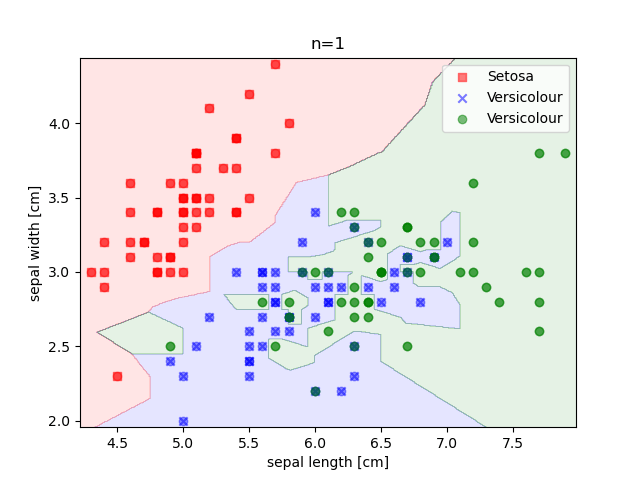

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
data_dic = datasets.load_iris()
features = data_dic['data']
targets = data_dic['target']
c1 = features[targets==0]
c2 = features[targets==1]
c3 = features[targets==2]
ind1, ind2 = 0,1
plt.scatter(c1[:,ind1],c1[:,ind2], color='red', marker='s', alpha=0.5, label="Setosa")
plt.scatter(c2[:,ind1],c2[:,ind2], color='blue', marker='x', alpha=0.5, label="Versicolour")
plt.scatter(c3[:,ind1],c3[:,ind2], color='green', marker='o', alpha=0.5, label="Versicolour")
plt.legend()
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]");
def subSample(nData):
    X = np.empty((3*nData,2))
    X[:nData] = c1[:nData,(ind1, ind2)]
    X[nData:2*nData] = c2[:nData,(ind1, ind2)]
    X[2*nData:] = c3[:nData,(ind1, ind2)]
    Y = np.empty(3*nData)
    Y[:nData] = np.zeros(nData)
    Y[nData:2*nData] = np.ones(nData)
    Y[2*nData:] = 2*np.ones(nData)
    return X,Y
X, Y = subSample(50)
scaler = StandardScaler()
X = scaler.fit_transform(X)
resolution=0.01
def regions3(X, y, classifier, colors = ['red','blue','green']):
    markers = ('s', 'x', 'o', '^', 'v') # setup marker generator and color map
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # plot the decision surface
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    rescaledX = scaler.inverse_transform(np.array([xx1.ravel(), xx2.ravel()]).T) # inverse scaling of xx1 and xx2
    xx1_rescaled = rescaledX[:,0].reshape(xx1.shape)
    xx2_rescaled = rescaledX[:,1].reshape(xx2.shape)
    plt.contourf(xx1_rescaled, xx2_rescaled, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1_rescaled.min(), xx1_rescaled.max())
    plt.ylim(xx2_rescaled.min(), xx2_rescaled.max())
    c2 = scaler.inverse_transform(X[y==2])
    c1 = scaler.inverse_transform(X[y==1])
    c0 = scaler.inverse_transform(X[y==0])
    xb,yb=c0[:,0],c0[:,1]
    plt.scatter(xb,yb,color=colors[0],alpha=0.4)
    xb,yb=c1[:,0],c1[:,1]
    plt.scatter(xb,yb,color=colors[1],alpha=0.4)
    xb,yb=c2[:,0],c2[:,1]
    plt.scatter(xb,yb,color=colors[2],alpha=0.4)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]');
for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30]:
    KNclass = KNeighborsClassifier(n_neighbors=k)
    KNclass.fit(X, Y)
    regions3(X, Y, KNclass)
    plt.title("n={}".format(k))
    if k <= 9:
        plt.savefig(f'graphs/K/k0{k}.png')
    else :
        plt.savefig(f'graphs/K/k{k}.png')
    plt.close()
imgs = os.listdir('graphs/K/')
imgs.sort()
imgs=imgs[1:]
imgs = [cv2.imread('graphs/K/' + i) for i in imgs]
imgs = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in imgs]
imageio.mimsave('graphs/k.gif', imgs, fps=1.5)
path="graphs/k.gif"
with open(path,'rb') as f:
    display(IpyImage(data=f.read(), format='png'))

# Autoencoder and Variate Autoencoder (VAE)

# Object Detection

# Object Segmentation

# U-Net

# Generative Adversarial Network (GAN) and Deep Convolutional GAN

# Style Transfer

# Super-Resolution with GAN, Autoencoder

# (Self) Compatitivly Generative Network (CGN) - Ensemble model of GAN

Two GAN models trained by discriminators with the same dataset. After few epochs later, two GANs generate the same prediction compatitively and final discriminator choose better one and worse one get feedback from final discriminator.

develop to tournament model

# Functional API in TensorFlow2

# Gradient Tape in TensorFlow2

# Reinforcement Learning